In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
import gdown

In [2]:
!gdown --id 1UxZmHg62nAEdmYQONOvFtZIMnzE2Haw_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UxZmHg62nAEdmYQONOvFtZIMnzE2Haw_
To: /content/data.zip
100% 771M/771M [00:11<00:00, 69.1MB/s]


In [3]:
zip_path = '/content/data.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
folder_path = '/content/dataset'
dir = os.listdir(folder_path)
print(dir)

['cataract', 'normal', 'diabetic_retinopathy', 'glaucoma']


In [5]:
for i in range(len(dir)):
    file_types = set()

    current_folder_path = os.path.join(folder_path, dir[i])

    for file_name in os.listdir(current_folder_path):
        file_types.add(file_name.split('.')[-1])

    print(f"{dir[i]}: {file_types}")

cataract: {'png', 'jpg'}
normal: {'jpg'}
diabetic_retinopathy: {'jpeg'}
glaucoma: {'png', 'jpg'}


In [6]:
import cv2

for i in range(len(dir)):
    class_folder = os.path.join(folder_path, dir[i])
    files_path = os.listdir(class_folder)
    sizes = set()

    for file_path in files_path:
        image = cv2.imread(os.path.join(class_folder, file_path))

        if image is not None:
          height, width, channel = image.shape
          sizes.add((height, width, channel))
        else:
          print(f"Failed to read image: {file_path}")

    print('(Height, Width, Channels)')
    print(100*'-')
    print(f"{dir[i]}: {sizes}")


(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
cataract: {(512, 512, 3), (1728, 2592, 3), (1632, 2464, 3), (1224, 1848, 3), (256, 256, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
normal: {(512, 512, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
diabetic_retinopathy: {(512, 512, 3)}
(Height, Width, Channels)
----------------------------------------------------------------------------------------------------
glaucoma: {(512, 512, 3), (1728, 2592, 3), (1632, 2464, 3), (1224, 1848, 3), (256, 256, 3)}


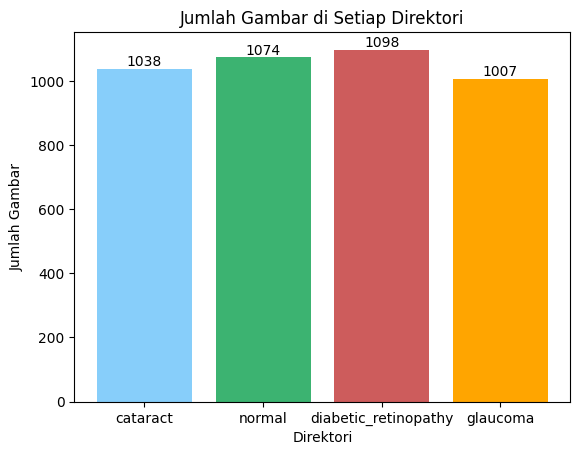

In [7]:
# Hitung jumlah gambar di setiap direktori
image_counts = []
for directory in dir:
    sub_dir = os.path.join(folder_path, directory)
    if os.path.isdir(sub_dir):
        file_count = len(os.listdir(sub_dir))
        image_counts.append(file_count)

# Menambahkan nilai jumlah di setiap bar
for i, count in enumerate(image_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Menetapkan beberapa warna
colors = ['lightskyblue', 'mediumseagreen', 'indianred', 'orange']

# Menampilkan hasil
plt.bar(dir, image_counts, color=colors)
plt.xlabel('Direktori')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar di Setiap Direktori')
plt.show()


In [8]:
from pathlib import Path
cataract = Path('/content/dataset/cataract')
diabetic_retinopathy = Path('/content/dataset/diabetic_retinopathy')
glaucoma = Path('/content/dataset/glaucoma')
normal = Path('/content/dataset/normal')

In [9]:
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
df = pd.DataFrame()

for types in disease_type:
    for idx, imagepath in enumerate(types.iterdir()):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)


In [10]:
df

,image,disease_type
0,/content/dataset/glaucoma/Glaucoma_055.png,0
1,/content/dataset/glaucoma/_211_3409683.jpg,0
2,/content/dataset/glaucoma/_48_3684538.jpg,0
3,/content/dataset/glaucoma/Glaucoma_033.png,0
4,/content/dataset/glaucoma/_124_11722.jpg,0
...,...,...
4212,/content/dataset/diabetic_retinopathy/10431_ri...,3
4213,/content/dataset/diabetic_retinopathy/11265_le...,3
4214,/content/dataset/diabetic_retinopathy/10786_le...,3
4215,/content/dataset/diabetic_retinopathy/1275_lef...,3


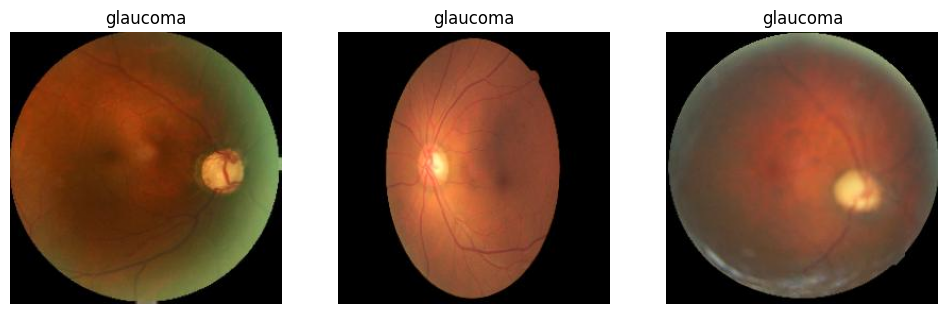

In [11]:
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()
plot_image(0)

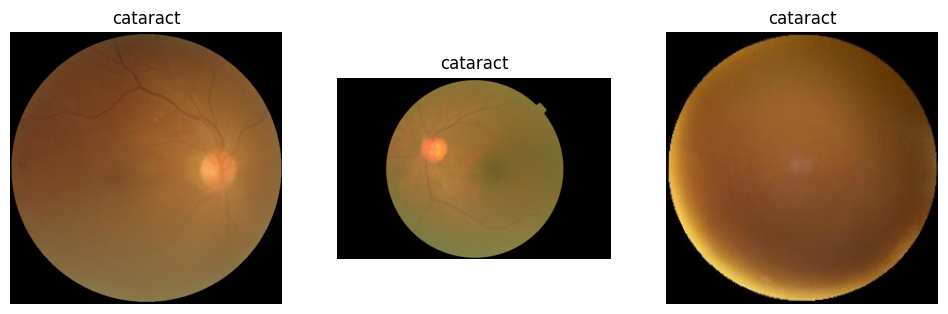

In [12]:
plot_image(1)

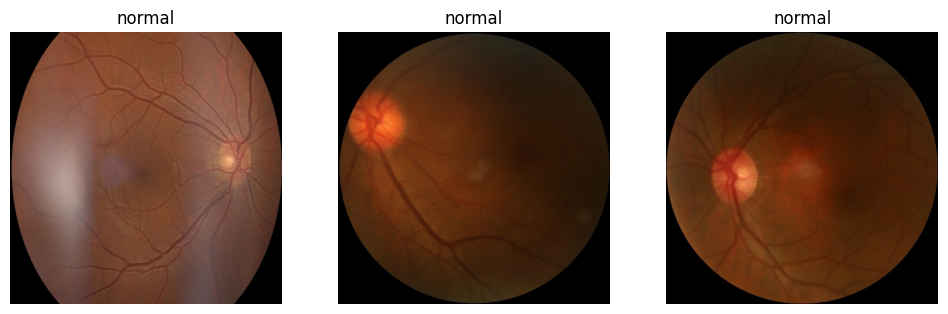

In [13]:
plot_image(2)

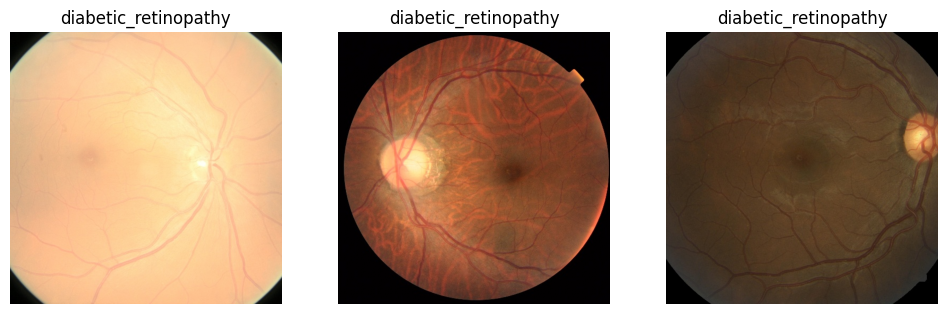

In [14]:
plot_image(3)

In [15]:
len(df['disease_type'].unique())

4

In [16]:
df['disease_type'] = pd.to_numeric(df['disease_type'])
df

,image,disease_type
0,/content/dataset/glaucoma/Glaucoma_055.png,0
1,/content/dataset/glaucoma/_211_3409683.jpg,0
2,/content/dataset/glaucoma/_48_3684538.jpg,0
3,/content/dataset/glaucoma/Glaucoma_033.png,0
4,/content/dataset/glaucoma/_124_11722.jpg,0
...,...,...
4212,/content/dataset/diabetic_retinopathy/10431_ri...,3
4213,/content/dataset/diabetic_retinopathy/11265_le...,3
4214,/content/dataset/diabetic_retinopathy/10786_le...,3
4215,/content/dataset/diabetic_retinopathy/1275_lef...,3


In [17]:
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})
df

,image,disease_type
0,/content/dataset/glaucoma/Glaucoma_055.png,glaucoma
1,/content/dataset/glaucoma/_211_3409683.jpg,glaucoma
2,/content/dataset/glaucoma/_48_3684538.jpg,glaucoma
3,/content/dataset/glaucoma/Glaucoma_033.png,glaucoma
4,/content/dataset/glaucoma/_124_11722.jpg,glaucoma
...,...,...
4212,/content/dataset/diabetic_retinopathy/10431_ri...,diabetic_retinopathy
4213,/content/dataset/diabetic_retinopathy/11265_le...,diabetic_retinopathy
4214,/content/dataset/diabetic_retinopathy/10786_le...,diabetic_retinopathy
4215,/content/dataset/diabetic_retinopathy/1275_lef...,diabetic_retinopathy


In [18]:
df = df.sample(frac=1).reset_index(drop=True)
df

,image,disease_type
0,/content/dataset/cataract/_383_4165819.jpg,cataract
1,/content/dataset/glaucoma/_149_7432879.jpg,glaucoma
2,/content/dataset/diabetic_retinopathy/11581_le...,diabetic_retinopathy
3,/content/dataset/cataract/_69_4758198.jpg,cataract
4,/content/dataset/glaucoma/1488_right.jpg,glaucoma
...,...,...
4212,/content/dataset/glaucoma/_361_9282542.jpg,glaucoma
4213,/content/dataset/diabetic_retinopathy/10266_ri...,diabetic_retinopathy
4214,/content/dataset/normal/3312_left.jpg,normal
4215,/content/dataset/cataract/_183_2695432.jpg,cataract


In [19]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
train_generator = training_datagen.flow_from_dataframe(dataframe=df,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

val_generator = training_datagen.flow_from_dataframe(dataframe=df,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

Found 3374 validated image filenames belonging to 4 classes.
Found 843 validated image filenames belonging to 4 classes.


In [20]:
from keras.applications import VGG16,ResNet50

pre_trained_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
pre_trained_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

# Tambahkan lapisan kelas baru untuk klasifikasi 6 kelas penyakit
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Output layer dengan 4 kelas dan aktivasi softmax

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 126353284 (482.00 MB)
Trainable params: 126300164 (481.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    verbose=1)

Epoch 1/10
106/106 [==============================] - 2917s 28s/step - loss: 3.7894 - accuracy: 0.6669 - val_loss: 1024.7227 - val_accuracy: 0.3369
